# Classification

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Importation des données

Le fichier "AffinitesVotesONU.txt" est organisé comme indiqué ci-dessous :
- Une ligne renseigne la similarité des votes pour deux pays pendant une année.
- Les états sont codés par les champs "statea" et "stateb". 
- Le champ  "year" donne l'année considérée pour la comparaison des votes.
- Plusieurs indices de comparaison des votes sont fournis, dans la suite on s'intéresse à l'indice de similarité sur 3 niveaux  de votes (oui / non / abstension) :  "agree3un".

Le fichier "StateList.csv" est organisé comme indiqué ci-dessous :
- Une ligne correspond à un pays.
- Le champ "StateAbb" nous donne les abréviations (utile pour les représentations graphiques)
- Le champ "state" est le même code que celui utilisé dans VotingFull
- Le champ "CodeTP" est simplement le numéro de ligne
- Les champs "OPEP" et "UE" renseignent l'année d'entrée dans l'OPEP ou dans l'UE (0 sinon).

Les données étudiées dans ce TP provienne de la plateforme de données [Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/12379), elles contiennent des indices de similarité entre les votes des pays à l'ONU. 

### Question 1.
Importez les données et affichez les premières lignes de chaque tableau de données. Vous nommerez <code>VotingFull</code> le dataframe contenant les données de "AffinitesVotesONU.txt" et vous nommerez <code>ListCountry</code> le dataframe contenant les données de "StateList.csv"

In [2]:
VotingFull = pd.read_csv("AffinitesVotesONU.txt",delim_whitespace=True,header=0)

ListCountry = pd.read_csv("StateList.csv",header=0)

Affichage des premières lignes de `VotingFull` et `ListCountry`:

In [3]:
VotingFull.head()

,dyadidyr,cntryera,cntryerb,statea,stateb,stateaname,statebname,year,s2un,s3un,agree2un,agree3un,jointvotes2,jointvotes3
0,2020946,21946,201946,2,20,United States of America,Canada,1946,0.7435897435897436,0.714286,0.8717948717948718,0.857143,39,42
1,2020947,21947,201947,2,20,United States of America,Canada,1947,0.8857142857142857,0.842105,0.9428571428571428,0.921053,35,38
2,2020948,21948,201948,2,20,United States of America,Canada,1948,0.8426966292134832,0.740385,0.9213483146067416,0.870192,89,104
3,2020949,21949,201949,2,20,United States of America,Canada,1949,0.9512195121951219,0.781250,0.975609756097561,0.890625,41,64
4,2020950,21950,201950,2,20,United States of America,Canada,1950,0.8048780487804879,0.641509,0.9024390243902439,0.820755,41,53


In [4]:
ListCountry.head()

,StateAbb,state,StateNme,CodeTP,OPEP,UE
0,USA,2,United States of America,0,0,0
1,CAN,20,Canada,1,0,0
2,BHM,31,Bahamas,2,0,0
3,CUB,40,Cuba,3,0,0
4,HAI,41,Haiti,4,0,0


# Extraction des similarités de vote pour une periode donnée

In [5]:
# periode étudiée :
annee_debut = 2000
annee_fin  = 2015   

# indice max des indices "state" (.values : syntaxe numpy )
maxstate = max(ListCountry.state.values)
print("indice max de state : " + str(maxstate))

# indice max dans CodeTP : 
maxCodeTP = max(ListCountry.CodeTP.values)
print("indice max de CodeTP : " + str(maxCodeTP))

indice max de state : 990
indice max de CodeTP : 216


Une ligne de `VotingFull` nous renseigne sur la dissemblance entre deux pays (indiqués par le codage `state`). Cependant utiliser le codage `state` pour définir les lignes et les colonnes de la matrice de dissemblance pose problème car le code `state` oublie de nombreux entiers, la matrice de dissemblance ainsi construite comporterait de nombreuses lignes et colonnes inutiles. Nous allons donc utiliser le code ad-hoc `CodeTP` qui lui ne saute pas d'entiers.

Le vecteur `Translate` ci-dessous permet de passer du codage `state` au codage `CodeTP`.

In [6]:
Translate = - np.ones(maxstate+1,dtype = int) 
for numline in range(maxCodeTP):
    Translate[ListCountry.state[numline]] =  ListCountry.CodeTP[numline]

Par exemple le pays de code statea = 40 a pour indice 3 (on part de 0) pour "CodeTP" :

In [7]:
Translate[40]

3

### Création de la matrice de dissemblance `D` 

Les numéros de ligne et de colonnes de $D$ correspondent au code "CodeTP". On remplit la matrice de dissemblance en parcourant les lignes de VotingFull et en ne sélectionnant que celles dont l'année appartient à la période étudiée.

La dissemblance d'une année t est définie par :  1 - agree3un(t).

On cumule les dissemblances sur la periode étudiée : 
$$D (paysA,paysB) = \sum_{t= debut} ^{fin}  (1- agree3un(t)) $$ 

On commence par créer une matrice de dissemblance de bonne dimension (remplie de zeros) :

In [8]:
D = np.zeros((maxCodeTP+1,maxCodeTP+1)) 

### Question 2.
Parcourez les lignes de <code>VotingFull</code> pour rempir la matrice $D$.

In [9]:
# boucle sur les lignes de VotingFull (prend une petite minute)
for numline in range(VotingFull.shape[0]):
    if (VotingFull.year[numline] >= annee_debut)&(VotingFull.year[numline] <= annee_fin): 
        D[Translate[VotingFull.statea[numline]],Translate[VotingFull.stateb[numline]]] +=  1-VotingFull.agree3un[numline]
        D[Translate[VotingFull.stateb[numline]],Translate[VotingFull.statea[numline]]] +=  1- VotingFull.agree3un[numline]

In [10]:
print(D[:,0])

[  0.           5.2496744    9.75857272  10.77747037   9.78953298
   9.75748166   9.98083881   9.91486942  10.11394731   9.93216728
   9.41652027  10.0568149   10.16539219  10.13268824   9.34052848
   9.64490069   9.9953602    9.41668022   9.29922823   9.59975342
   9.90979232   9.490892     9.25631945   9.80575016  10.64067861
  10.1335239    9.96042724  10.24666294   9.37770227   9.7431642
  10.12043719   9.69359025   9.41274706   9.0350083    9.59166893
   5.34338545   7.01055309   6.4821324    6.51337605   6.56182879
   5.69146386   6.39218717   6.88415402   5.97756381   6.64284626
   6.7072439    6.65792008   0.           0.           6.52018879   0.           0.
   0.           0.           0.           0.           0.           0.
   6.43829915   0.           6.91111014   6.46602067   0.           6.43787286
   6.57688122   6.66531938   0.           0.           6.83468576   0.           0.
   0.           7.21045968   5.9929692    3.63999382   6.67048188
   6.69719019   7.34064

Cependant, certaines lignes n'ont pas été remplies. En effet tous les pays ne sont pas renseignés dans la matrice car certains pays n'existent pas ou plus à la date choisie. 
Par exemple : 

In [11]:
D[50,]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

On doit retirer ces pays de la matrice de dissemblance, ce sont les pays dont les lignes ou colonnes ont une somme égale à 0 

### Question 3.
Calculez la matrice $Dextract$ qui correspond à la matrice de dissemblance $D$ dont on a enlevé les lignes ou colonnes qui ont une somme égale à 0.

In [12]:
I = np.array([ i for i in range(maxCodeTP) if D.sum(1)[i] != 0])
print(I)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  49  58  60  61  63  64  65
  68  72  73  74  75  76  77  78  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 164 166 167 168 169 170 171 172 173 174 175 176 177 178 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215]


In [13]:
Dextract = D[I,:][:,I]  #  rq : D[I,I] ne fonctionne pas

## Clustering hierarchique avec la librairie Scipy

Le module cluster de la librairie Scipy contient de nombreuses fonctions permettant de mettre en oeuvre les méthodes de classification non supervisée. Nous allons utiliser la fonction hierarchy de ce module, qui offre notamment la possibilité de tracer le dendrogramme, voir http://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy.

La première étape pour effectuer une classification hierarchique en utilisant consiste à calculer la matrice de distance. Classiquement cette étape est effectuée par la fonction pdist de scipy : http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.pdist.html Cette fonction renvoie une matrice sous forme condensée (en effet la matrice de distance étant symétrique, il n'est pas nécessaire de stocker tous ses coefficients). La seconde étape consiste à appliquer la fonction linkage à la matrice de distance condensée http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Dans le cas présent, nous utiliserons la matrice de dissemblance calculée auparavant. Pour pouvoir lui appliquer la fonction linkage, il nous faut préalablement convertir la matrice de dissemblance sous une "forme condensée" :


In [14]:
import scipy.spatial.distance as ssd # module scipy pour manipuler des distances 
distArray = ssd.squareform(Dextract)

### Question 4.
Appliquez la fonction <code>linkage</code> du module <code>cluster.hierarchy</code> pour produire un clustering dont vous représenterez le dendrogramme: 
- avec la méthode de plus courte distance (single linkage)
- avec la méthode de Ward (ward linkage)

In [15]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

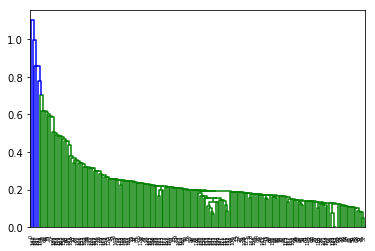

In [16]:
linkAverage = linkage(distArray,method='single')
dendrogram(linkAverage);

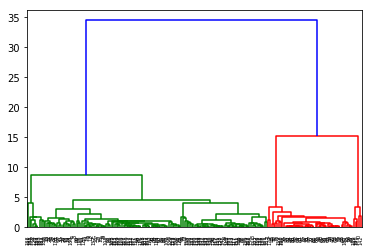

In [17]:
linkAverage = linkage(distArray,method='ward')
dendrogram(linkAverage);

Lorsqu'on ne connait pas le nombre de classes qu'il pourrait y avoir dans les données, on peut essayer de le "deviner" à partir du dendrogram. Pour cela, il existe plusieurs méthodes, l'une d'entre elle consiste à garder les classes à l'étape $i$ qui maximise la valeur $|h_{i+1} - h_i |$ où $h_i$ est la dissemblance entre les deux classes que l'on a fusionné à l'étape $i$. Sur un dendrogram, les $h_i$ correspondent aux plateaux et comme les $h_i$ sont croissant par rapport à $i$, la technique précedente revient à couper le graphique là où le saut entre deux plateaux consécutifs est le plus grand.

### Question 5.
Déterminez avec la méthode décrite précédemment combien de classes devrait-on garder pour le dendrogram réalisé avec la méthode de Ward. Utilisez la fonction <code>fcluster</code> du module <code>cluster.hierarchy</code> pour retrouver les classes. Pour chaque classe, affichez les noms des pays y appartenant (Attention, lors du calcul de la matrice de dissemblance nous avons enlever des pays qui n'avaient pas voté durant la période étudiée, il faudra penser à les enlever ici aussi). 

In [18]:
from scipy.cluster.hierarchy import fcluster

linkAverage = linkage(distArray,method='ward')
clusters = fcluster(linkAverage,20.,criterion='distance')
clusters

array([2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2])

In [19]:
ListCountry['StateNme'][I][(clusters==1)]

2                             Bahamas
3                                Cuba
4                               Haiti
5                  Dominican Republic
6                             Jamaica
7                 Trinidad and Tobago
8                            Barbados
9                            Dominica
10                            Grenada
11                          St. Lucia
12     St. Vincent and the Grenadines
13                  Antigua & Barbuda
14                St. Kitts and Nevis
15                             Mexico
16                             Belize
17                          Guatemala
18                           Honduras
19                        El Salvador
20                          Nicaragua
21                         Costa Rica
22                             Panama
23                           Colombia
24                          Venezuela
25                             Guyana
26                           Suriname
27                            Ecuador
28          

In [20]:
ListCountry['StateNme'][I][(clusters==2)]

0            United States of America
1                              Canada
35                     United Kingdom
36                            Ireland
37                        Netherlands
38                            Belgium
39                         Luxembourg
40                             France
41                             Monaco
42                      Liechtenstein
43                        Switzerland
44                              Spain
45                            Andorra
46                           Portugal
49                            Germany
58                             Poland
60                            Austria
61                            Hungary
63                     Czech Republic
64                           Slovakia
65                              Italy
68                         San Marino
72                              Malta
73                            Albania
74                         Montenegro
75                          Macedonia
76          

### Question 6.
Affichez un diagramme en bâtons avec un bâton qui représente le nombre de pays ayant rejoint l'OPEP (par classes)  et avec un bâton qui représente le nombre de pays ayant rejoint l'UE (par classes). Que remarquez-vous ?

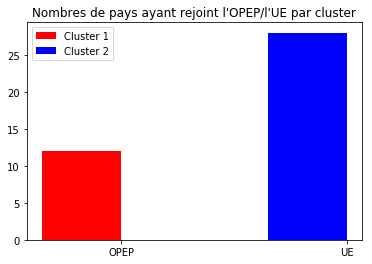

In [21]:
ind = np.arange(2) # les coordonnées des abscisses x des bâtons
width = 0.35       # largeur des bâtons 

cluster_1 = [np.sum((ListCountry['OPEP'][I]>0.)&(clusters==1)),np.sum((ListCountry['UE'][I]>0.)&(clusters==1))]
cluster_2 = [np.sum((ListCountry['OPEP'][I]>0.)&(clusters==2)),np.sum((ListCountry['UE'][I]>0.)&(clusters==2))]

plt.figure(1)
p1 = plt.bar(ind, cluster_1, width, color='r')
p2 = plt.bar(ind, cluster_2, width, color='b', bottom=cluster_1)

plt.title('Nombres de pays ayant rejoint l'"'OPEP/l'"'UE par cluster')
plt.xticks(ind + width/2., ('OPEP', 'UE'))
plt.legend((p1[0], p2[0]), ('Cluster 1', 'Cluster 2'),loc=0)

On remarque que le cluster 1 contient tous les pays ayant rejoint l'OPEP et le cluster 2 contient tous les pays ayant rejoint l'UE. Donc la classification semble cohérente dans le sens où il semble cohérent que les pays de l'OPEP votent de la même manière, que les pays de l'UE votent de la même manière mais qu'il y ai une dissemblance entre des pays de l'OPEP et des pays de l'UE.